In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Function Review

In [ ]:
# Function has return statement
def percent(num, total):
    return np.round(num/total*100, 3)

In [ ]:
# Thus you can do stuff with the returned value
x = percent(33, 200)
x

In [2]:
# Function only has return statement
def percent(num, total):
    print(np.round(num/total*100, 3))

In [3]:
# The function prints the value it computes
y = percent(33, 200)

16.5


In [5]:
# But returns a NoneType
type(y)

NoneType

In [6]:
# Which you can't do operations with
y + 5

TypeError: unsupported operand type(s) for +: 'NoneType' and 'int'

In [7]:
def woo(num):
    print(num)
    return num

In [8]:
woo(5)

5


5

In [9]:
z = woo(5)

5


In [10]:
z

5

## Prediction Review ##

In [11]:
galton = Table.read_table('galton.csv')
galton

family,father,mother,midparentHeight,children,childNum,gender,childHeight
1,78.5,67,75.43,4,1,male,73.2
1,78.5,67,75.43,4,2,female,69.2
1,78.5,67,75.43,4,3,female,69
1,78.5,67,75.43,4,4,female,69
2,75.5,66.5,73.66,4,1,male,73.5
2,75.5,66.5,73.66,4,2,male,72.5
2,75.5,66.5,73.66,4,3,female,65.5
2,75.5,66.5,73.66,4,4,female,65.5
3,75,64,72.06,2,1,male,71
3,75,64,72.06,2,2,female,68


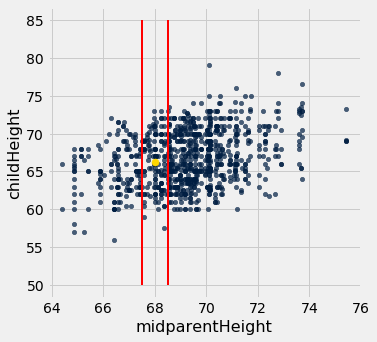

In [12]:
# Here's where we left of Wednesday
# Gold dot is result of averageing child height with similar midparent heights
galton.scatter('midparentHeight', 'childHeight')
plots.plot([67.5, 67.5], [50, 85], color='red', lw=2)
plots.plot([68.5, 68.5], [50, 85], color='red', lw=2)
plots.scatter(68, 66.24, color='gold', s=50);

In [13]:
def predict(h):
    nearby = galton.where("midparentHeight", are.between(h-0.5, h+0.5))
    return np.mean(nearby.column("childHeight"))

In [14]:
predict(70)

67.27285067873302

In [15]:
predict(69)

66.38858267716537

In [69]:
pred_heights = galton.apply(predict, "midparentHeight")

In [17]:
galton = galton.with_column("predictedHeights", pred_heights)
galton

family,father,mother,midparentHeight,children,childNum,gender,childHeight,predictedHeights
1,78.5,67,75.43,4,1,male,73.2,70.1
1,78.5,67,75.43,4,2,female,69.2,70.1
1,78.5,67,75.43,4,3,female,69,70.1
1,78.5,67,75.43,4,4,female,69,70.1
2,75.5,66.5,73.66,4,1,male,73.5,70.4158
2,75.5,66.5,73.66,4,2,male,72.5,70.4158
2,75.5,66.5,73.66,4,3,female,65.5,70.4158
2,75.5,66.5,73.66,4,4,female,65.5,70.4158
3,75,64,72.06,2,1,male,71,68.5025
3,75,64,72.06,2,2,female,68,68.5025


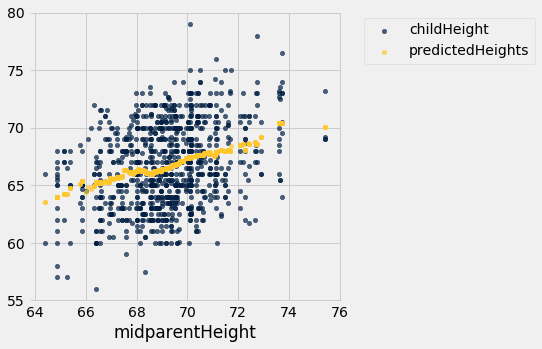

In [19]:
galton.select("midparentHeight", "childHeight", "predictedHeights").scatter("midparentHeight")

## Apply With Multiple Columns ##

In [21]:
def difference(x, y):
    return x - y 

In [22]:
errors = galton.apply(difference, 'childHeight', 'predictedHeights')

In [23]:
galton = galton.with_column("error", errors)
galton

family,father,mother,midparentHeight,children,childNum,gender,childHeight,predictedHeights,error
1,78.5,67,75.43,4,1,male,73.2,70.1,3.1
1,78.5,67,75.43,4,2,female,69.2,70.1,-0.9
1,78.5,67,75.43,4,3,female,69,70.1,-1.1
1,78.5,67,75.43,4,4,female,69,70.1,-1.1
2,75.5,66.5,73.66,4,1,male,73.5,70.4158,3.08421
2,75.5,66.5,73.66,4,2,male,72.5,70.4158,2.08421
2,75.5,66.5,73.66,4,3,female,65.5,70.4158,-4.91579
2,75.5,66.5,73.66,4,4,female,65.5,70.4158,-4.91579
3,75,64,72.06,2,1,male,71,68.5025,2.4975
3,75,64,72.06,2,2,female,68,68.5025,-0.5025


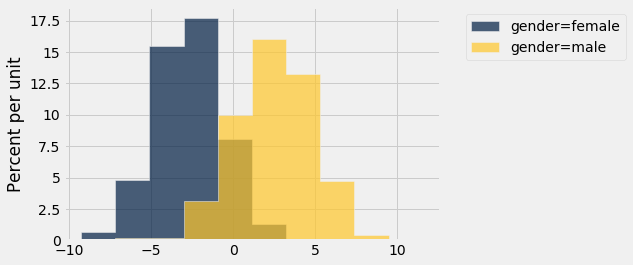

In [24]:
galton.hist('error', group='gender')

## Grouping by One Category ##

In [25]:
cones = Table.read_table('cones.csv')
cones

Flavor,Color,Price
strawberry,pink,3.55
chocolate,light brown,4.75
chocolate,dark brown,5.25
strawberry,pink,5.25
chocolate,dark brown,5.25
bubblegum,pink,4.75


In [26]:
cones.group("Flavor")

Flavor,count
bubblegum,1
chocolate,3
strawberry,2


In [27]:
# Function applied to every other column in table besides grouped column
# But calling average on strings doesn't make sense so color average col is empty
cones.group("Flavor", np.average)

Flavor,Color average,Price average
bubblegum,,4.75
chocolate,,5.08333
strawberry,,4.4


In [28]:
# Thus its common to drop cols that don't work with function before grouping
cones.drop("Color").group("Flavor", np.average)

Flavor,Price average
bubblegum,4.75
chocolate,5.08333
strawberry,4.4


In [29]:
# Can't pass in multiple functions - must do separate group calls
cones.group("Flavor", abs(sum))

TypeError: bad operand type for abs(): 'builtin_function_or_method'

In [30]:
cones.drop("Color").group("Flavor", min)

Flavor,Price min
bubblegum,4.75
chocolate,4.75
strawberry,3.55


In [32]:
def spread(arr):
    return max(arr) - min(arr)

In [33]:
# Can pass in user defined functions
cones.drop("Color").group("Flavor", spread)

Flavor,Price spread
bubblegum,0
chocolate,0.5
strawberry,1.7


## Survey Example

In [ ]:
survey = Table.read_table('survey_clean.csv')
survey = survey.relabeled('In what year are you in your cumulative undergraduate studies?',
                         'Year in Undergrad')\
                .relabeled('In what year are you in your cumulative time at UC Berkeley?',
                            'Year at Cal')\
                .relabeled('Do you consider yourself an introvert or extrovert?',
                          'Extroversion Rating')\
                .relabeled('How many different people do you text (or any other forms of direct messaging) per day on average?',
                          'People Texted Per Day')\
                .relabeled('On average, how many hours of sleep do you get each night?',
                          'Hours of Sleep')\
                .relabeled('Are you left-handed or right-handed?', 'Handedness')\
                .relabeled('Which leg do you put in first when putting on pants?', 'Pants Leg Preference')
survey = survey.where("Year in Undergrad", are.not_equal_to(np.nan))
survey.show(5)

## Grouping by Two Categories ##

In [34]:
cones

Flavor,Color,Price
strawberry,pink,3.55
chocolate,light brown,4.75
chocolate,dark brown,5.25
strawberry,pink,5.25
chocolate,dark brown,5.25
bubblegum,pink,4.75


In [ ]:
# Mental tally of color-flavor combos
# Dont run this cell
strawberry and pink xx
chocolate and light brown x
choclate and dark brown xx
bubblegum and pink x

In [37]:
# Need brackets for two groups
cones.group(["Flavor", "Color"])

Flavor,Color,count
bubblegum,pink,1
chocolate,dark brown,2
chocolate,light brown,1
strawberry,pink,2


In [39]:
# This is what group does by default - if you want count just don't specify function
cones.group(["Flavor", "Color"], len)

Flavor,Color,Price len
bubblegum,pink,1
chocolate,dark brown,2
chocolate,light brown,1
strawberry,pink,2


In [38]:
cones.group(["Flavor", "Color"], np.average)

Flavor,Color,Price average
bubblegum,pink,4.75
chocolate,dark brown,5.25
chocolate,light brown,4.75
strawberry,pink,4.4


In [ ]:
# You can provide any number of cols between the brackets above

## Pivot Tables ##

In [40]:
cones

Flavor,Color,Price
strawberry,pink,3.55
chocolate,light brown,4.75
chocolate,dark brown,5.25
strawberry,pink,5.25
chocolate,dark brown,5.25
bubblegum,pink,4.75


In [ ]:
# want a table of this format - don't run this cell
    bubblegum chocolate strawberry
pink
light
dark

In [41]:
cones.pivot("Flavor", "Color")

Color,bubblegum,chocolate,strawberry
dark brown,0,2,0
light brown,0,1,0
pink,1,0,2


In [43]:
# Different order changes which is columns and rows
cones.pivot("Color", "Flavor")

Flavor,dark brown,light brown,pink
bubblegum,0,0,1
chocolate,2,1,0
strawberry,0,0,2


In [44]:
# If you want function, must specify what value it is called on
cones.pivot("Flavor", "Color", values="Price", collect=np.average)

Color,bubblegum,chocolate,strawberry
dark brown,0,5.25,0
light brown,0,4.75,0
pink,4.75,0,4.4


In [45]:
# Can't just tell function without column
cones.pivot("Flavor", "Color", np.average)

TypeError: values requires collect to be specified

In [46]:
cones.pivot("Flavor", "Color", values="Price", collect=spread)

Color,bubblegum,chocolate,strawberry
dark brown,0,0,0
light brown,0,0,0
pink,0,0,1.7


In [48]:
cones.pivot("Flavor", "Color", values="Price", collect=list)

Color,bubblegum,chocolate,strawberry
dark brown,None,"[5.25, 5.25]",None
light brown,None,[4.75],None
pink,[4.75],None,"[3.55, 5.25]"


In [49]:
cones.pivot("Flavor", "Color", "Price", np.average)

Color,bubblegum,chocolate,strawberry
dark brown,0,5.25,0
light brown,0,4.75,0
pink,4.75,0,4.4


# NBA Data

In [50]:
nba = Table.read_table('nba_salaries.csv').relabeled(3, 'SALARY')
nba

PLAYER,POSITION,TEAM,SALARY
Paul Millsap,PF,Atlanta Hawks,18.6717
Al Horford,C,Atlanta Hawks,12
Tiago Splitter,C,Atlanta Hawks,9.75625
Jeff Teague,PG,Atlanta Hawks,8
Kyle Korver,SG,Atlanta Hawks,5.74648
Thabo Sefolosha,SF,Atlanta Hawks,4
Mike Scott,PF,Atlanta Hawks,3.33333
Kent Bazemore,SF,Atlanta Hawks,2
Dennis Schroder,PG,Atlanta Hawks,1.7634
Tim Hardaway Jr.,SG,Atlanta Hawks,1.30452


In [ ]:
# CHALLENGE QUESTION 1: for each team,
# amount paid to "starter" (player earning the most) in each position

In [51]:
nba.drop("PLAYER").group(["POSITION", "TEAM"], max)

POSITION,TEAM,SALARY max
C,Atlanta Hawks,12
C,Boston Celtics,2.61698
C,Brooklyn Nets,1.3629
C,Charlotte Hornets,13.5
C,Chicago Bulls,13.4
C,Cleveland Cavaliers,14.2609
C,Dallas Mavericks,5.2
C,Denver Nuggets,5.6135
C,Detroit Pistons,6.5
C,Golden State Warriors,13.8


In [55]:
starters_g = nba.drop("PLAYER").group(["TEAM", "POSITION"], max)
starters_g

TEAM,POSITION,SALARY max
Atlanta Hawks,C,12
Atlanta Hawks,PF,18.6717
Atlanta Hawks,PG,8
Atlanta Hawks,SF,4
Atlanta Hawks,SG,5.74648
Boston Celtics,C,2.61698
Boston Celtics,PF,5
Boston Celtics,PG,7.73034
Boston Celtics,SF,6.79612
Boston Celtics,SG,3.42551


In [53]:
nba.pivot("POSITION", "TEAM", values="SALARY", collect=max)

TEAM,C,PF,PG,SF,SG
Atlanta Hawks,12,18.6717,8,4,5.74648
Boston Celtics,2.61698,5,7.73034,6.79612,3.42551
Brooklyn Nets,1.3629,11.236,6.3,24.8949,3.42551
Charlotte Hornets,13.5,7,12,6.3314,13.1253
Chicago Bulls,13.4,5.54373,20.0931,2.38044,16.4075
Cleveland Cavaliers,14.2609,19.689,16.4075,22.9705,8.98876
Dallas Mavericks,5.2,15.4937,5.37897,15.3615,1.449
Denver Nuggets,5.6135,11.236,4.345,14,1.58448
Detroit Pistons,6.5,0,13.913,2.84196,6.27
Golden State Warriors,13.8,14.2609,11.3708,11.7105,15.501


In [54]:
nba.pivot("POSITION", "TEAM")

TEAM,C,PF,PG,SF,SG
Atlanta Hawks,3,2,2,2,5
Boston Celtics,3,2,4,2,4
Brooklyn Nets,1,3,2,2,5
Charlotte Hornets,3,3,4,2,6
Chicago Bulls,2,2,2,2,4
Cleveland Cavaliers,4,1,3,1,1
Dallas Mavericks,2,2,4,1,2
Denver Nuggets,4,2,2,4,2
Detroit Pistons,3,0,1,4,2
Golden State Warriors,3,3,2,4,2


In [ ]:
# CHALLENGE QUESTION 2: for each team,
# total amount paid to all "starters"

In [57]:
starters_g.group("TEAM", sum).sort("SALARY max sum", descending=True)

TEAM,POSITION sum,SALARY max sum
Cleveland Cavaliers,,82.3166
Oklahoma City Thunder,,70.6988
Miami Heat,,67.1273
San Antonio Spurs,,67.034
Golden State Warriors,,66.6431
Houston Rockets,,61.2029
Chicago Bulls,,57.8247
Los Angeles Lakers,,55.8276
New York Knicks,,55.0595
Memphis Grizzlies,,53.5235


## Joins ##

In [58]:
drinks = Table(['Drink', 'Cafe', 'Price']).with_rows([
    ['Milk Tea', 'Tea One', 4],
    ['Espresso', 'Nefeli',  2],
    ['Latte',    'Nefeli',  3],
    ['Espresso', "Abe's",   2]
])
drinks

Drink,Cafe,Price
Milk Tea,Tea One,4
Espresso,Nefeli,2
Latte,Nefeli,3
Espresso,Abe's,2


In [64]:
discounts = Table().with_columns(
    'Coupon % off', make_array(25, 50, 5),
    'Cafe', make_array('Tea One', 'Nefeli', 'Tea One')
)
discounts

Coupon % off,Cafe
25,Tea One
50,Nefeli
5,Tea One


In [61]:
combined = drinks.join("Cafe", discounts, "Location")
combined

Cafe,Drink,Price,Coupon % off
Nefeli,Espresso,2,50
Nefeli,Latte,3,50
Tea One,Milk Tea,4,25
Tea One,Milk Tea,4,5


In [63]:
combined.with_columns("Discounted Price", 
                     combined.column("Price")*(1 - combined.column("Coupon % off")/100))

Cafe,Drink,Price,Coupon % off,Discounted Price
Nefeli,Espresso,2,50,1
Nefeli,Latte,3,50,1.5
Tea One,Milk Tea,4,25,3
Tea One,Milk Tea,4,5,3.8


In [65]:
drinks.join("Cafe", discounts)

Cafe,Drink,Price,Coupon % off
Nefeli,Espresso,2,50
Nefeli,Latte,3,50
Tea One,Milk Tea,4,25
Tea One,Milk Tea,4,5


In [66]:
drinks.join("Cafe", drinks)

Cafe,Drink,Price,Drink_2,Price_2
Abe's,Espresso,2,Espresso,2
Nefeli,Espresso,2,Espresso,2
Nefeli,Espresso,2,Latte,3
Nefeli,Latte,3,Espresso,2
Nefeli,Latte,3,Latte,3
Tea One,Milk Tea,4,Milk Tea,4
